##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 8***

---
***Full names of all students in the team: Arnav Arvind, Arnav Yayavaram, Shailesh Chandra Rao, Siddharth Yayavaram, Suryansh Chandola***

---
***Id number of all students in the team: 2021A7PS2709H, 2021A7PS3117H, 2021A7PS2064H, 2021A7PS3116H, 2021A7PS0058H***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# **_1. Preprocessing of Dataset (Project 1)_**

In [2]:
df = pd.read_csv('Heart_Disease.csv')
df.replace('?',np.NaN,inplace = True)
# print(df.head())    # We observe that there are no column names in the dataframe
df.columns = ['hospital','age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
#adding column names for ease in interpreting data. Column names have been referred from the given data description document.
datatypes = df.dtypes
print("\n",datatypes)
df.head()


 hospital    object
age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object


,hospital,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,Cleveland,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,Cleveland,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,Cleveland,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,Cleveland,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,Cleveland,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [3]:
rows,columns = df.shape
rows,columns
# So the dataset contains 919 rows and 15 columns

(919, 15)

In [4]:
df['hospital'].value_counts()

Cleveland      302
Hungarian      294
VA             200
Switzerland    123
Name: hospital, dtype: int64

In [5]:
def hospital_num(x):
    if x == 'Cleveland':
        return 0
    elif x == 'Hungarian':
        return 1
    elif x == 'VA':
        return 2
    else:
        return 3 
df['hospital'] = df['hospital'].apply(hospital_num)

<Axes: xlabel='num', ylabel='Count'>

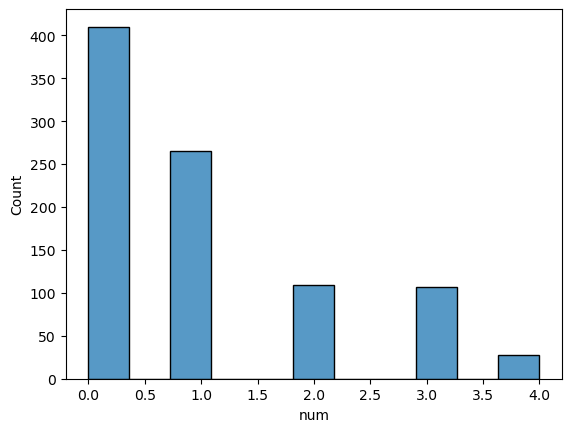

In [6]:
# df['num'].value_counts()
sns.histplot(df['num'])
# We observe that the target column has more than just 0 and 1 values unlike the given feature description.

<Axes: xlabel='num', ylabel='Count'>

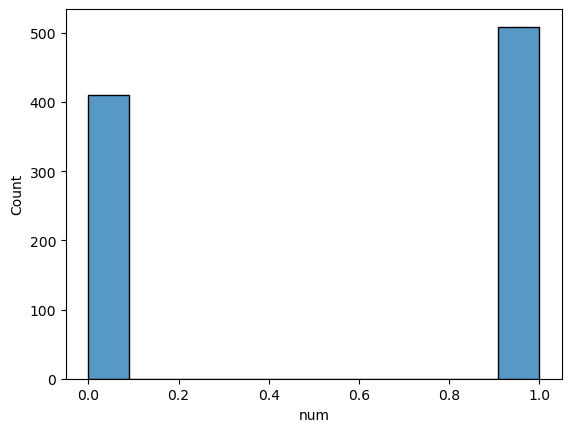

In [7]:
def non_zero_to_one(x):
    if x != 0:
        return 1
    else:
        return 0
df['num'] = df['num'].apply(non_zero_to_one)
# thus we convert all non zero values to 1 
sns.histplot(df['num'])
# We observe that after the modification the number of 0s and 1s are not equal.

**We observe that in columns: trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca and thal have NaN values in them**   

In [8]:
nan_columns = []
for column in df.columns:
    print(f"Column {column} unique values: \n{df[column].unique()}\n")
    if df[column].isnull().values.any():
        nan_columns.append(column)
nan_columns

Column hospital unique values: 
[0 1 3 2]

Column age unique values: 
[67 37 41 56 62 57 63 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]

Column sex unique values: 
[1 0]

Column cp unique values: 
[4 3 2 1]

Column trestbps unique values: 
['160' '120' '130' '140' '172' '150' '110' '132' '117' '135' '112' '105'
 '124' '125' '142' '128' '145' '170' '155' '104' '180' '138' '108' '134'
 '122' '115' '118' '100' '200' '94' '165' '102' '152' '101' '126' '174'
 '148' '178' '158' '192' '129' '144' '123' '136' '146' '106' '156' '154'
 '114' '164' '98' '190' nan '113' '92' '95' '80' '185' '116' '0' '96'
 '127']

Column chol unique values: 
['286' '229' '250' '204' '236' '268' '354' '254' '203' '192' '294' '256'
 '263' '199' '168' '239' '275' '266' '211' '283' '284' '224' '206' '219'
 '340' '226' '247' '167' '230' '335' '234' '233' '177' '276' '353' '243'
 '225' '302' '212' '330' '175' '417' '197' '198' '290' 

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

**Now we check the number of NaN values in these columns to decide what should be done with the rows containing '?'**

In [9]:
df[nan_columns].count()

trestbps    860
chol        889
fbs         829
restecg     917
thalach     864
exang       864
oldpeak     857
slope       610
ca          308
thal        433
dtype: int64

| Column | # of NaN values | Strategy |
|:------ | :-------------- | :------- |
| trestbps   |  59 | Replace with mean |
| chol       |  30 | Replace with mean |
| fbs        |  90 | Replace with mode |
| restecg    |   2 | Drop              |
| thalach    |  55 | Replace with mean |
| exang      |  55 | Replace with mode |
| oldpeak    |  62 | Replace with mean |
| slope      | 309 | Replace with mode |
| ca         | 611 | Replace with mode | 
| thal       | 486 | Replace with mode |

In [10]:
mean = ['trestbps', 'chol', 'thalach', 'oldpeak']
mode = ['fbs', 'exang', 'slope', 'ca', 'thal']
def convert_to_float(x):
    if x!= x:
        return x
    return float(x)
df.drop(df[df['restecg'].isna()].index,inplace = True)
df['restecg'] = df['restecg'].apply(convert_to_float)

In [11]:
df['fbs'] = df['fbs'].apply(convert_to_float)
df['fbs'] = df['fbs'].fillna(0)
df['fbs'].count()

917

In [12]:
# df['fbs'] = df['fbs'].apply(convert_to_float)
df['fbs'].value_counts()

0.0    780
1.0    137
Name: fbs, dtype: int64

In [13]:
def fill_na_with_mean(x):
    y = x.apply(convert_to_float)
    return y.fillna(y.mean())
def fill_na_with_mode(x):
    y = x.apply(convert_to_float)
    return y.fillna(y.mode()[0])

858
917


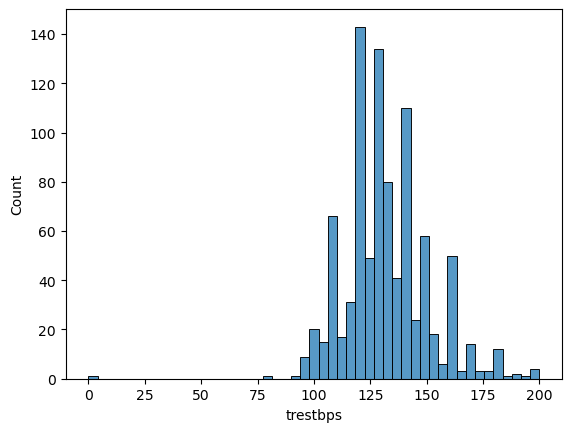

887
917


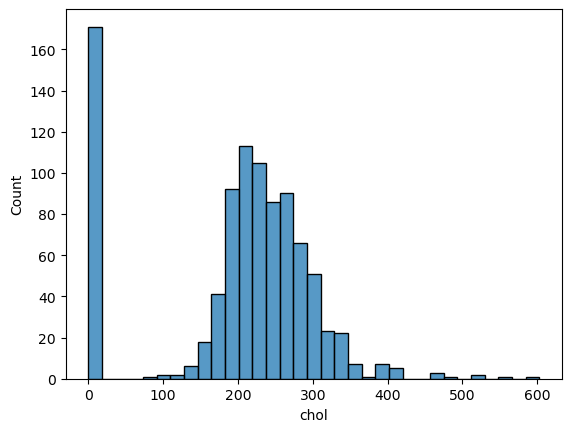

862
917


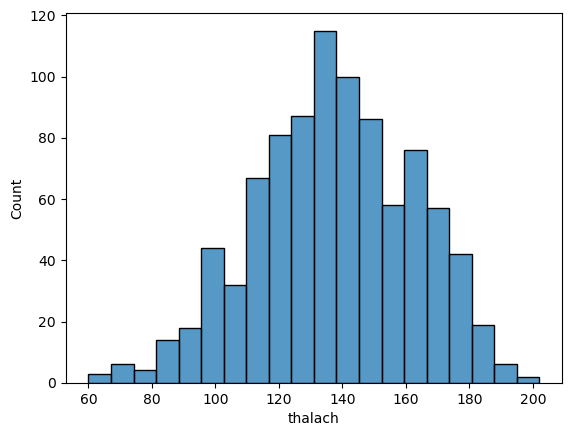

855
917


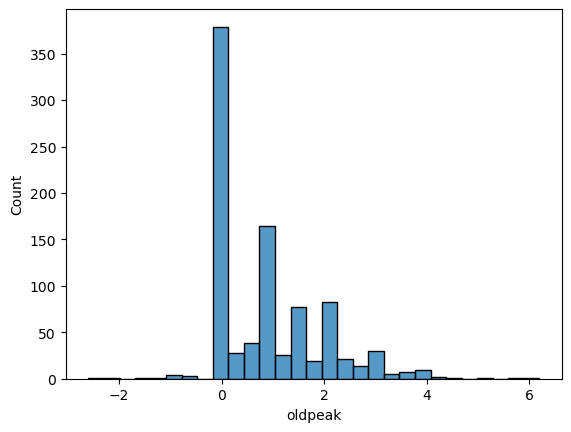

In [14]:
for column in mean:
    print(df[column].count())
    df[column] = fill_na_with_mean(df[column])
    print(df[column].count())
    sns.histplot(df[column])
    plt.show()

917
917


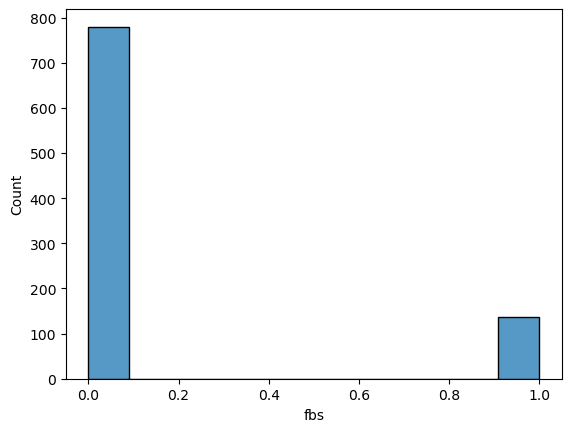

862
917


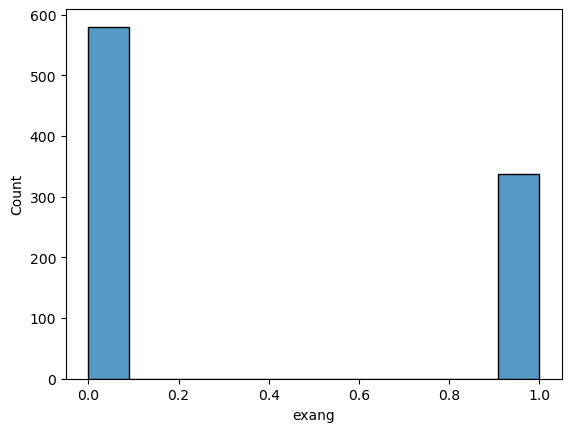

609
917


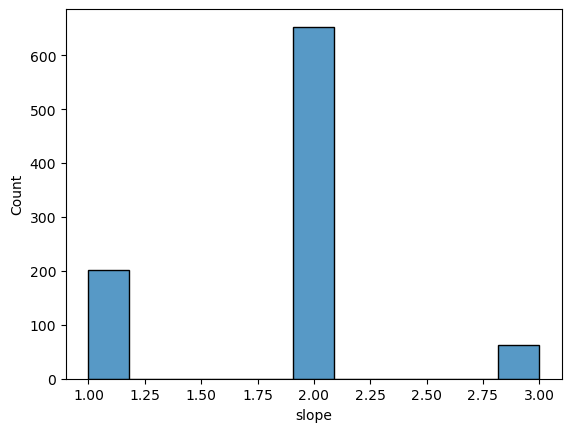

308
917


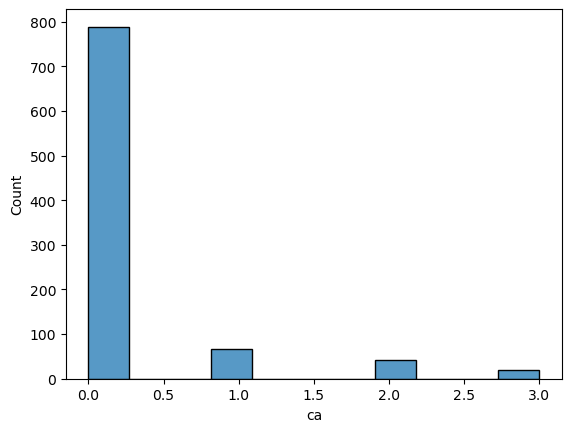

433
917


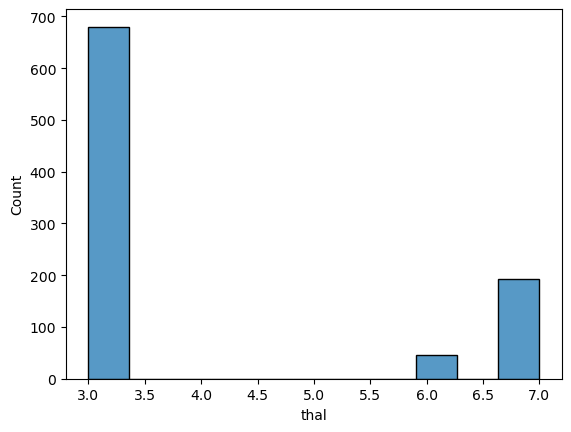

In [15]:
for column in mode:
    print(df[column].count())
    df[column] = fill_na_with_mode(df[column])
    print(df[column].count())
    sns.histplot(df[column])
    plt.show()

In [16]:
df.dtypes

hospital      int64
age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

# ***2. ML Model 1***

# ***3. ML Model 2***

# ***4. ML Model 3***

# ***5. ML Model 4 (Based on research literature)***

In [20]:
class outer_class:
    
    def __init__(self, num_trees, ip, op,lr, gamma, lda):
        self.num_trees = num_trees
        self.ip = ip
        self.op = op
        self.lr = lr
        self.gamma = gamma
        self.odds = 0.5
        self.trees = []
        self.prev_preds = np.ones(num_trees)*0.5
        self.lda = lda
    
    def build_trees(self):
        for i in range(self.num_trees):
            self.trees.append(Tree(self.ip,self.op,self.prev_pred, self.lda))

    def sigmoid(self,ip):
        return exp(ip)/(exp(ip)+1)
            
    def predict(self,ip):
        odds = 0.5
        for i in self.trees:
            odds+=(self.lr*i.traverse(ip))
            if sigmoid(odds)>=0.5:
                return 1
            else:
                return 0

In [21]:
class Tree:
    
    def __init__(self, ip, op, prev_pred, lda):
        self.ip = np.array(ip)
        self.op = np.array(op)
        self.prev_pred = np.array(prev_pred)
        self.residual = op-prev_pred
        self.head = self.make_tree(ip,self.residual,0, self.lda)
    
    def make_tree(self, ip, residual, depth, lda):
        if depth > 5:
            return none
        head = Node(ip, residual, self.lda)
        head.left = make_tree(ip, head.res_left, depth+1, self.lda)
        head.right = make_tree(ip, head.res_right, depth+1, self.lda)
        return head
    
    def traverse(self, ip):
        for i in ip:
            head_copy = self.head
            output = []
            condition = 0
            while (head_copy.left != none) and (head_copy.right != none):
                column = head_copy.column
                if i[column]<head_copy.test:
                    head_copy = head_copy.left
                else:
                    head_copy = head_copy.right
            output.append(head_copy.output)
            return out_value
    
#     def prune_tree(self):

In [22]:
class Node:
    
    def __init__(self, ip, residual, lda):
        self.ip = ip
        self.residual = residual
        self.lda = lda
        self.res_left = []
        self.res_right = []
        self.out_value = self.find_out_value()
        self.similarity = self.find_similarity(residual)
        self.column = 0
        self.test = 0
        self.find_best_division()
        
    def find_out_value(self):
        return self.residual.sum()/(len(self.residual)+self.lda)
    
    def  find_similarity(self,ip_list):
        return ip_list.sum()**2/(len(ip_list.sum())+self.lda)
    
    def find_best_division(self):
        values = []
        cur_gain = 0
        cur_column = 0
        test = 0
        for column in range(self.ip.shape[1]):
            values.clear()
            for j in range(self.ip.shape[0]):
                values.append(self.ip[column][j])
            values.sort()
            left = 0
            while left<self.ip.shape[0]-1:
                target = (values[left]+values[left+1])/2
                llist = self.residual[:left+1:]
                rlist = self.residual[left+1::]
                gain = self.find_similarity(llist)+self.find_similarity(rlist)-self.similarity
                if (column == 0) and (left == 0):
                    cur_gain = gain
                    self.test = target
                    self.res_left = llist
                    self.res_right = rlist
                else:
                    if gain>cur_gain:
                        cur_gain = gain
                        self.test = target
                        self.column = column
                        self.res_left = llist
                        self.res_right = rlist
                left+=1

# ***6. Comparison of insights drawn from the models***

# **_7. References_**

1.   List item
2.   List item

